In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/animal detection'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/animal detection


In [ ]:
!pip3 install opencv-python

In [ ]:
import cv2
import numpy as np

# Load Yolo
print("LOADING YOLO")
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
#save all the names in file o the list classes
classes = []
with open("yolov3.txt", "r") as f:
    classes = [line.strip() for line in f.readlines()]
#get layers of the network
layer_names = net.getLayerNames()
#Determine the output layer names from the YOLO model 
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
print("YOLO LOADED")

LOADING YOLO
YOLO LOADED


In [ ]:
from google.colab.patches import cv2_imshow

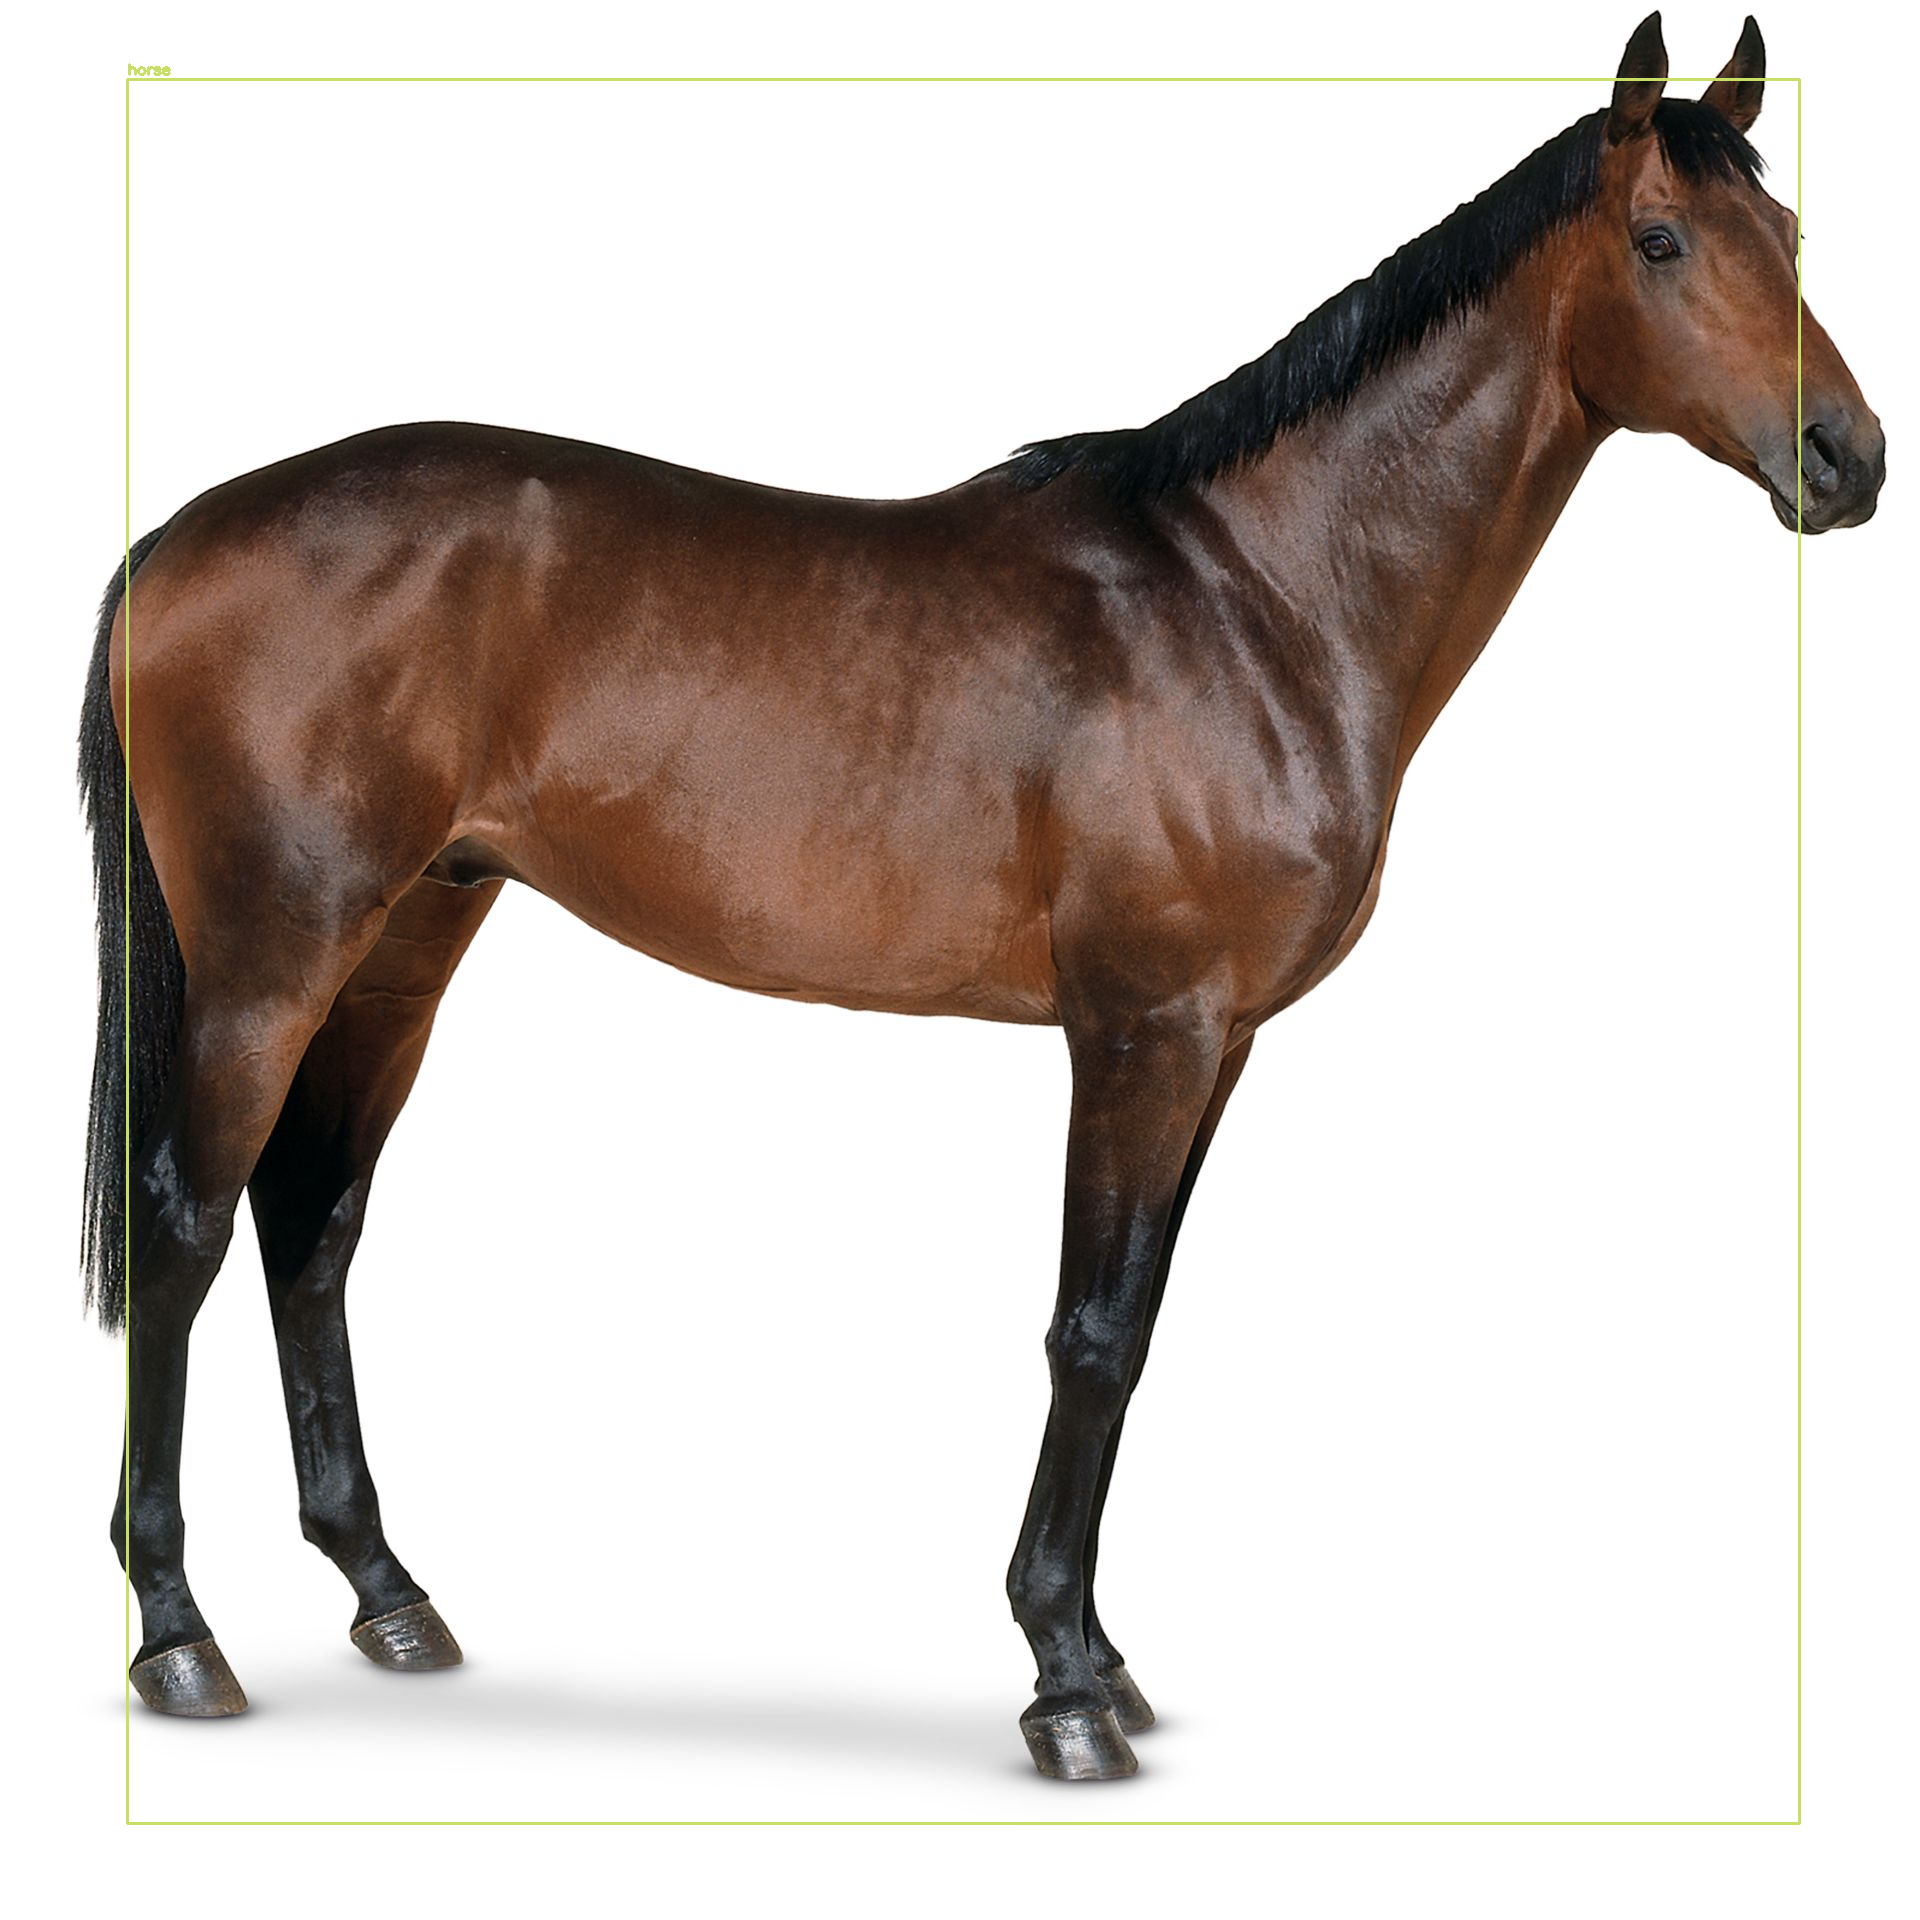

-1

In [ ]:
# Capture frame-by-frame
img = cv2.imread("hi.jpg")
#     img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

    # USing blob function of opencv to preprocess image
blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416),
swapRB=True, crop=False)
    #Detecting objects
net.setInput(blob)
outs = net.forward(output_layers)

    # Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.5:
                # Object detected
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)
      w = int(detection[2] * width)
      h = int(detection[3] * height)

                # Rectangle coordinates
      x = int(center_x - w / 2)
      y = int(center_y - h / 2)

      boxes.append([x, y, w, h])
      confidences.append(float(confidence))
      class_ids.append(class_id)
    
    #We use NMS function in opencv to perform Non-maximum Suppression
    #we give it score threshold and nms threshold as arguments.
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
colors = np.random.uniform(0, 255, size=(len(classes), 3))
for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y -5),cv2.FONT_HERSHEY_SIMPLEX,
			1/2, color, 2)

from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)

In [ ]:
import os

In [ ]:
def detect_animal(img):
  height, width, channels = img.shape

      # USing blob function of opencv to preprocess image
  blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416),
  swapRB=True, crop=False)
      #Detecting objects
  net.setInput(blob)
  outs = net.forward(output_layers)

      # Showing informations on the screen
  class_ids = []
  confidences = []
  boxes = []
  for out in outs:
    for detection in out:
      scores = detection[5:]
      class_id = np.argmax(scores)
      confidence = scores[class_id]
      if confidence > 0.5:
                  # Object detected
        center_x = int(detection[0] * width)
        center_y = int(detection[1] * height)
        w = int(detection[2] * width)
        h = int(detection[3] * height)

                  # Rectangle coordinates
        x = int(center_x - w / 2)
        y = int(center_y - h / 2)

        boxes.append([x, y, w, h])
        confidences.append(float(confidence))
        class_ids.append(class_id)
      
      #We use NMS function in opencv to perform Non-maximum Suppression
      #we give it score threshold and nms threshold as arguments.
  indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
  colors = np.random.uniform(0, 255, size=(len(classes), 3))
  for i in range(len(boxes)):
          if i in indexes:
              x, y, w, h = boxes[i]
              label = str(classes[class_ids[i]])
              color = colors[class_ids[i]]
              cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
              cv2.putText(img, label, (x, y -5),cv2.FONT_HERSHEY_SIMPLEX,
        1/2, color, 2)

  from google.colab.patches import cv2_imshow
  cv2_imshow(img)
  cv2.waitKey(0)

In [ ]:
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

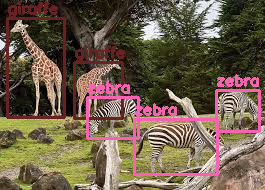

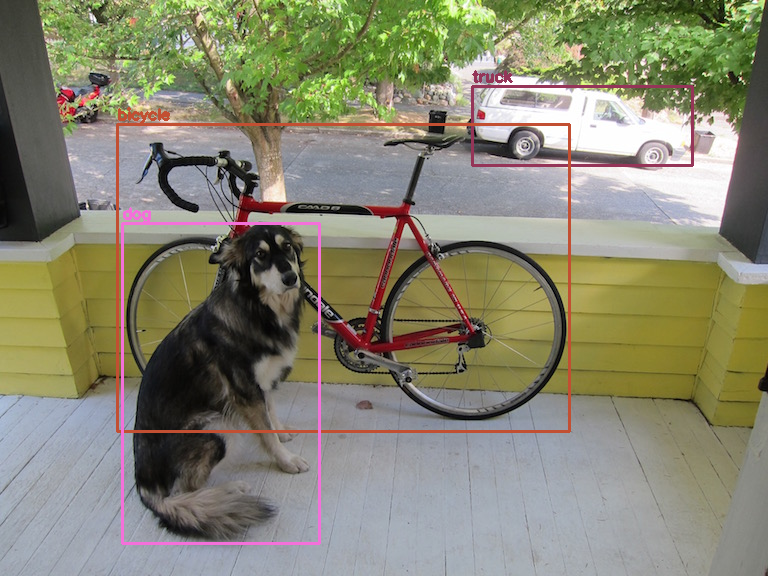

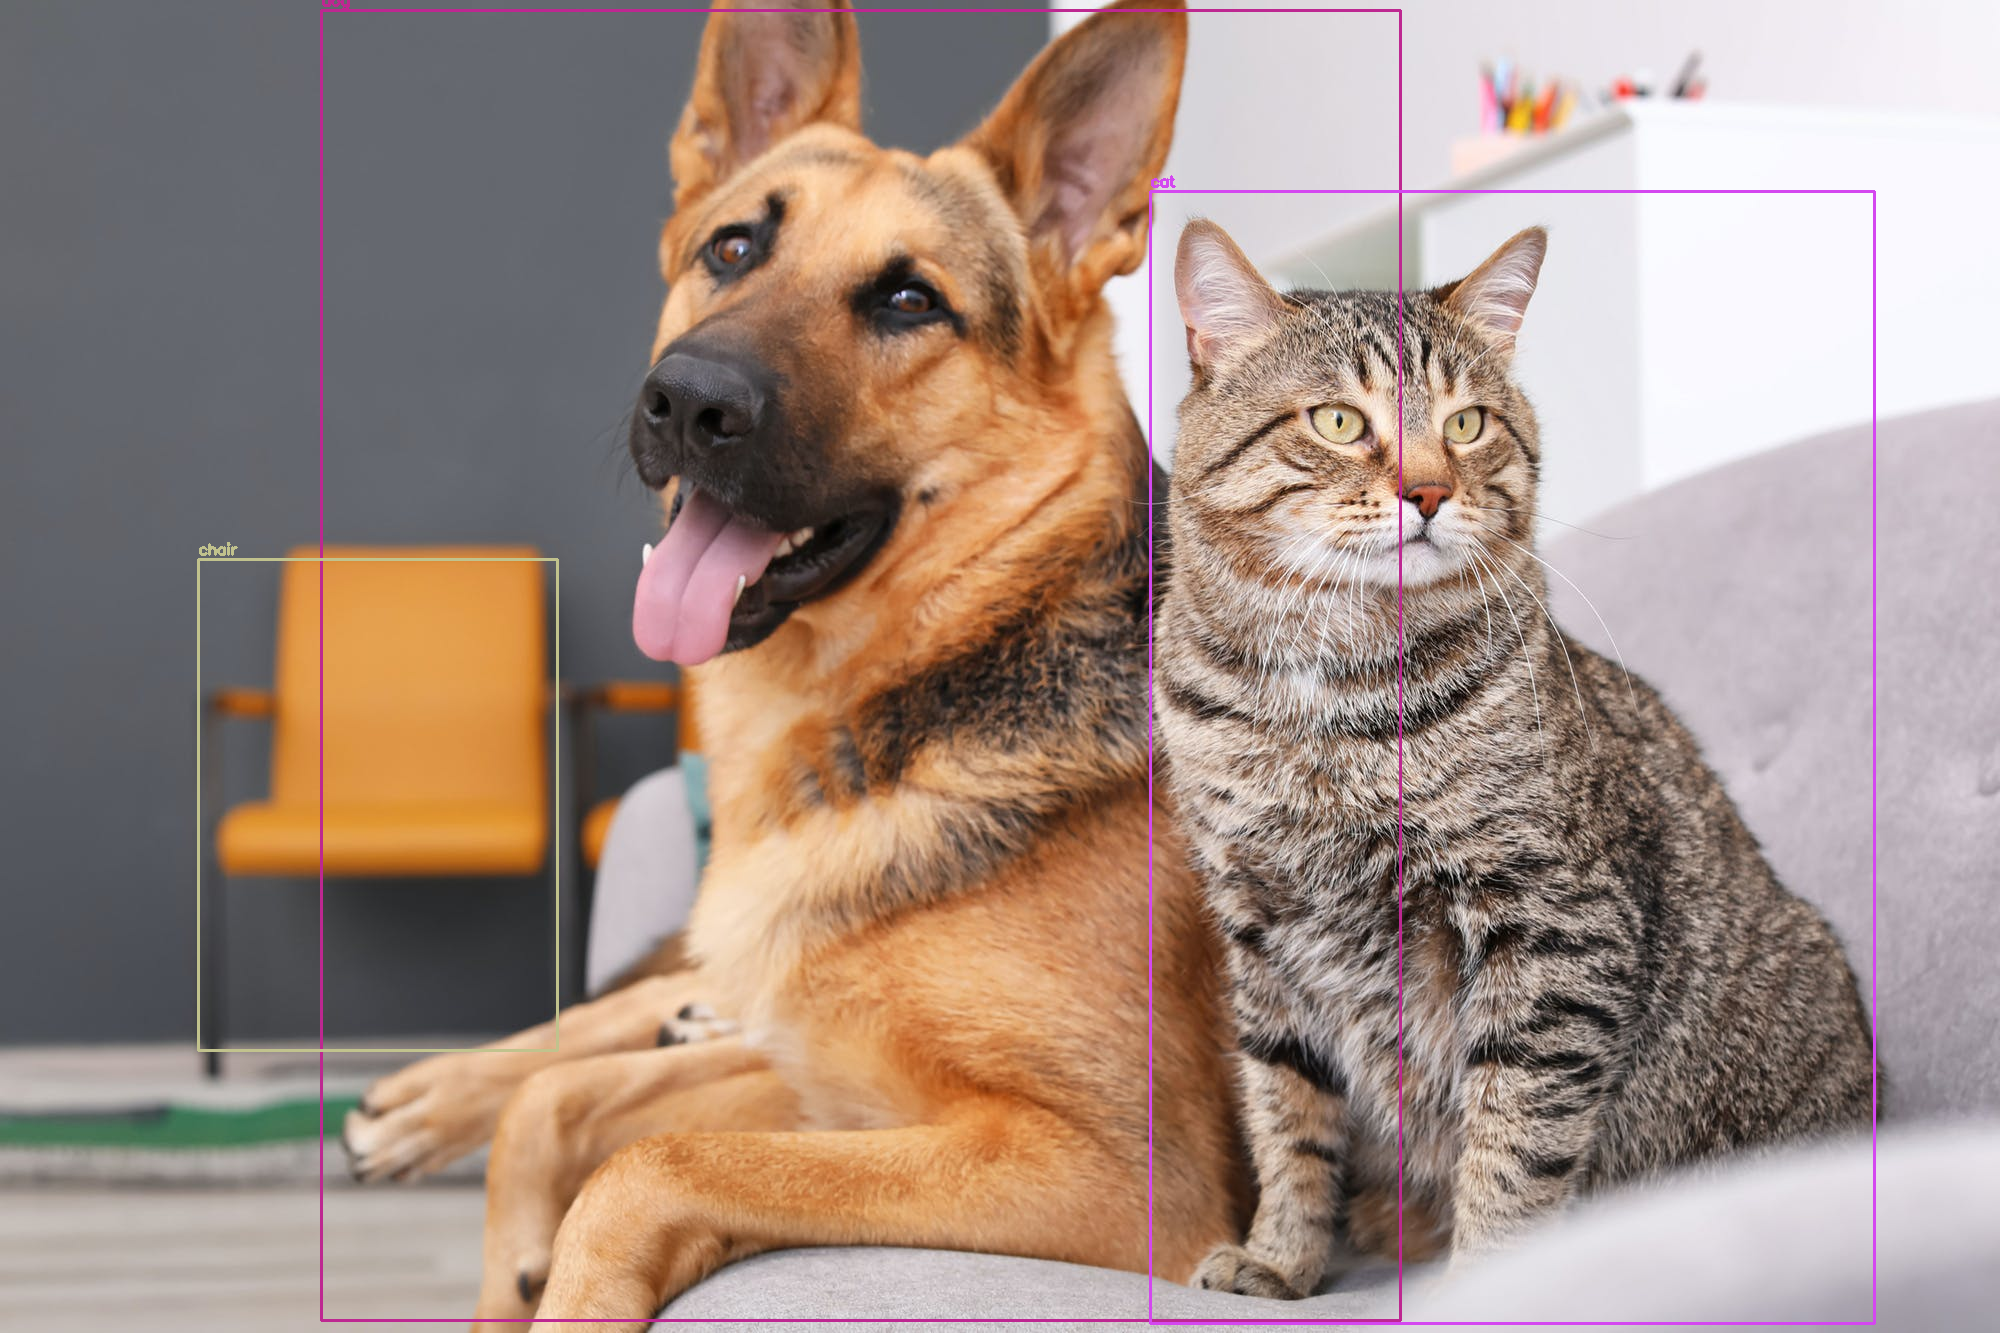

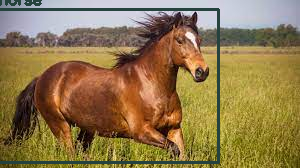

In [ ]:
folder = "images"
images = load_images(folder)
for i in images:
  detect_animal(i)